In [1]:
# project: p9
# submitter: zdai38
# partner: none

In [2]:
import os, json, csv

In [3]:
#Q1: What are the names of the files present in the data directory?
def get_dir(data):
    return sorted(os.listdir(data), reverse = True)

get_dir("data")

['sample_reviews.json',
 'sample_reviews.csv',
 'review5.json',
 'review5.csv',
 'review4.json',
 'review4.csv',
 'review3.json',
 'review3.csv',
 'review2.json',
 'review2.csv',
 'review1.json',
 'review1.csv',
 'products.json']

In [4]:
#Q2: What are the paths of all the files in the data directory?
def get_path(data):
    path = []
    for i in get_dir(data):
        path.append(os.path.join("data", i))
    return sorted(path, reverse = True)
get_path("data")

['data\\sample_reviews.json',
 'data\\sample_reviews.csv',
 'data\\review5.json',
 'data\\review5.csv',
 'data\\review4.json',
 'data\\review4.csv',
 'data\\review3.json',
 'data\\review3.csv',
 'data\\review2.json',
 'data\\review2.csv',
 'data\\review1.json',
 'data\\review1.csv',
 'data\\products.json']

In [5]:
#Q3: What are the paths of all the JSON files present in data directory?
def get_json_path(data):
    path = []
    for i in get_dir(data):
        if i[-4:] == "json":
            path.append(os.path.join("data", i))
    return sorted(path, reverse = True)
get_json_path("data")

['data\\sample_reviews.json',
 'data\\review5.json',
 'data\\review4.json',
 'data\\review3.json',
 'data\\review2.json',
 'data\\review1.json',
 'data\\products.json']

In [6]:
#Q4: What are the paths of all the files present in data directory, that begin with the phrase 'review'?
def get_review_path(data):
    path = []
    for i in get_dir(data):
        if i[:6] == "review":
            path.append(os.path.join("data", i))
    return sorted(path, reverse = True)
get_review_path("data")

['data\\review5.json',
 'data\\review5.csv',
 'data\\review4.json',
 'data\\review4.csv',
 'data\\review3.json',
 'data\\review3.csv',
 'data\\review2.json',
 'data\\review2.csv',
 'data\\review1.json',
 'data\\review1.csv']

In [7]:
#Q5: What are the products in products.json?
def read_json(file_name):
    f = open(os.path.join("data", file_name), encoding = "utf-8")
    json_str = f.read()
    f.close()
    data = json.loads(json_str)
    return data
read_json("products.json")

{'B00QFQRELG': 'Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders',
 'B01BH83OOM': 'Amazon Tap Smart Assistant Alexa enabled (black) Brand New',
 'B00ZV9PXP2': 'All-New Kindle E-reader - Black, 6" Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers',
 'B0751RGYJV': 'Amazon Echo (2nd Generation) Smart Assistant Oak Finish Priority Shipping',
 'B00IOY8XWQ': 'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers',
 'B0752151W6': 'All-new Echo (2nd Generation) with improved sound, powered by Dolby, and a new design Walnut Finish',
 'B018Y226XO': 'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case',
 'B01ACEKAJY': 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Black',
 'B01AHB9CYG': 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta',
 'B01AHB9CN2': 'All

In [8]:
#Q6: What is the review text of review with id 84440?
def read_csv(file_name):
    f = open(os.path.join("data", file_name), encoding = "utf-8")
    reader = csv.DictReader(f)
    data = []
    for i in reader:
        data.append(i)
    f.close()
    return data

def get_review_with_id_file(id,file_name):
    data = read_csv(file_name)
    for row in data:
        if row["review id"] == id:
            return row["review text"]
    return None 
get_review_with_id_file("84440","review1.csv")

'I would recommend this product. It works great and ver compact.'

In [9]:
#Q7: What is the review text of review with id 28615?
def get_csv_file(data):
    file= []
    for i in get_dir(data):
        if i[-3:] == "csv":
            file.append(i)
    return file

def get_review_with_id_in_csv(id):
    for i in get_csv_file("data"):
        if get_review_with_id_file(id,i) != None:
            return get_review_with_id_file(id,i)
    return None
get_review_with_id_in_csv("28615")

'Loveeeeeeeee........................................'

In [10]:
#Q8: What file contained the review with id 69273?
def get_file_with_id_in_csv(id):
    for i in get_csv_file("data"):
        if get_review_with_id_file(id,i) != None:
            return i
    return None
get_file_with_id_in_csv("69273")

'review2.csv'

In [11]:
#Q9: What is the data stored in sample_reviews.json?
read_json("sample_reviews.json")

{'46663': ['Dmh1589', 'B018Y229OU'],
 '36363': ['Shoot2thril', 'B018Y229OU'],
 '15763': ['Barbara', 'B018Y229OU'],
 '5463': ['Elec8', 'B018Y229OU'],
 '54066': ['Silvrblur', 'B018Y229OU'],
 '33466': ['Trish', 'B018Y229OU'],
 '40869': ['airbear', 'B018Y229OU'],
 '30569': ['lorphe', 'B018Y229OU'],
 '89472': ['felix', 'B018Y229OU'],
 '48272': ['Bull99', 'B018Y229OU']}

In [12]:
from collections import namedtuple

def get_reviews(csv, json):
    list_review = []
    Review = namedtuple("Review",["id", "username", "asin","title","text","rating","do_recommend","num_helpful","date"])
    csv_data = read_csv(csv)
    json_data = read_json(json)
    for j in json_data:
        for c in csv_data:
            if c["review id"] != "" and c["review title"] != "" and c["review text"] != "" and c["review rating"]!= "" and c["review date"] != "" and c["review date"]!=None:
                if c["review id"] == j and c["review rating"].isdigit():
                    list_review.append(Review(int(j), json_data[j][0], json_data[j][1], c["review title"] , c["review text"], int(c["review rating"]), c["review do_recommend"]=="True", int(c["review num_helpful"]), c["review date"]))
    return list_review

In [13]:
#Q10: What is produced by your function get_reviews('sample_reviews.csv', 'sample_reviews.json')?
get_reviews('sample_reviews.csv', 'sample_reviews.json')

[Review(id=46663, username='Dmh1589', asin='B018Y229OU', title='Nice for kids', text='Easy to use. Memory fills up fast though. Battery life is decent.', rating=4, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=36363, username='Shoot2thril', asin='B018Y229OU', title='Great tablet', text='Great tablet for the price. I already have 3 followers including the hd.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=15763, username='Barbara', asin='B018Y229OU', title='Great tablet', text='Excellent tablet. Love the size. Fits perfectly in my purse. I would recommend this tablet.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=5463, username='Elec8', asin='B018Y229OU', title='Great budget tablet', text='Great tablet for kids. Good for Netflix and YouTube.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=54066, username='Silvrblur', asin='B018Y229OU', title='Great tablet for the price.', text='I

In [14]:
#Q11: What are the first ten Review objects in the list produced by get_reviews('review4.csv', 'review4.json')?
get_reviews('review4.csv', 'review4.json')[:10]

[Review(id=46663, username='Dmh1589', asin='B018Y229OU', title='Nice for kids', text='Easy to use. Memory fills up fast though. Battery life is decent.', rating=4, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=36363, username='Shoot2thril', asin='B018Y229OU', title='Great tablet', text='Great tablet for the price. I already have 3 followers including the hd.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=15763, username='Barbara', asin='B018Y229OU', title='Great tablet', text='Excellent tablet. Love the size. Fits perfectly in my purse. I would recommend this tablet.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=5463, username='Elec8', asin='B018Y229OU', title='Great budget tablet', text='Great tablet for kids. Good for Netflix and YouTube.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=54066, username='Silvrblur', asin='B018Y229OU', title='Great tablet for the price.', text='I

In [15]:
#Q12: What are the last ten Review objects in the list produced by get_reviews('review2.csv', 'review2.json')?
get_reviews('review2.csv', 'review2.json')[-10:]

[Review(id=25136, username='Angrydagg', asin='B018Y229OU', title='Nice features for the price.', text='For the price this tables does everything I need. so far.', rating=4, do_recommend=True, num_helpful=0, date='2015-12-30'),
 Review(id=84039, username='Appman2015', asin='B018Y229OU', title='Great for xmas', text='So far I have bought three of these of tablets and they love it', rating=4, do_recommend=True, num_helpful=1, date='2015-12-30'),
 Review(id=22239, username='SuzieQ', asin='B018Y229OU', title='great for pre teens', text='i am glad i got them for my grand children they r enjoying them', rating=5, do_recommend=True, num_helpful=0, date='2015-12-31'),
 Review(id=70842, username='Gracie', asin='B018Y229OU', title='Great kindle', text='Purchase was good. Very easy to set up and use. Clear screen. Easy to charge. Would like more storage.', rating=5, do_recommend=True, num_helpful=0, date='2015-12-31'),
 Review(id=60542, username='Jeremyjeepster', asin='B018Y229OU', title='Good ent

In [16]:
#Q13: What is the Review object with review id 25401?
def get_obj_with_id(id):
    csv_name = get_file_with_id_in_csv(id)
    json_name = csv_name[:-3]+"json"
    list_review = get_reviews(csv_name, json_name)
    for i in list_review:
        if i.id == int(id):
            return i
get_obj_with_id("25401")

Review(id=25401, username='Brody16', asin='B018Y229OU', title='Wonderful for our grandsons', text='Love the ease of using them for our grandsons and they enjoyed them for Christmas', rating=1, do_recommend=True, num_helpful=0, date='2017-01-06')

In [17]:
#Q14: What is the Review object with review id 78626?
get_obj_with_id("78626")

Review(id=78626, username='Mijenx', asin='B01AHB9CN2', title='Ended up returning', text='I bought this tablet for my 4 year old daughter. Too many advertisements. I would rather pay more and not have a single ad.', rating=1, do_recommend=False, num_helpful=2, date='2016-11-25')

In [18]:
#Q15: List the first ten Review objects in the entire dataset, when the usernames are sorted in the reverse alphabetical order.
def review_dataset():
    review_list = []
    review_json_file = []
    for i in get_review_path("data"):
        for j in get_json_path("data"):
            if i==j:
                review_json_file.append(i[5:])
    for i in review_json_file:
        try:
            review_list.extend(get_reviews(i[:-4]+"csv", i))
        except:
            continue
    return review_list

def extract_username(review):
    return review.username

sorted(review_dataset(), key =extract_username, reverse = True)[:10]

[Review(id=29325, username='zerofighterblue', asin='B018Y229OU', title='cant live without', text='have a kindle with a broken screen. bought originally for 99.00. now regular price is 49.99 and were on sale black Friday for 34.99. got 2 more.', rating=5, do_recommend=True, num_helpful=1, date='2015-12-10'),
 Review(id=96947, username='zedog83', asin='B01AHB9CN2', title='Great for kids', text='Bought this for our 6 year old daughter and she uses it daily. She enjoys watching movies on it and playing learning games. So far it has been very durable and battery life has been great.', rating=5, do_recommend=True, num_helpful=0, date='2017-01-18'),
 Review(id=77499, username='zcraig7', asin='B018Y229OU', title='Awesome picture quality', text='I bought two of these for black friday and the kids love them', rating=5, do_recommend=True, num_helpful=0, date='2016-01-04'),
 Review(id=48890, username='zarm7', asin='B018Y229OU', title='This is a nice tablet', text='I bought it for reading books. An

In [19]:
review_list = review_dataset()

In [20]:
def bucketize(key):
    bucket = {}
    for i in range(len(review_list)):
        if getattr(review_list[i], key) in bucket:
            bucket[getattr(review_list[i], key)].append(review_list[i])
        else:
                bucket[getattr(review_list[i], key)] = [review_list[i]]
    return bucket

In [21]:
#Q16: Who are the top 22 prolific users in this dataset?
def count_each_username():
    g = {}
    bucket = bucketize("username")
    for i in bucket:
        g[i] = len(bucket[i])
    return g
count = count_each_username()

def get_value(i):
    return count[i]

def top_prolific_users(rank):
    g = {}
    sorted_list = sorted(count, key=get_value, reverse = True)
    for i in sorted_list[:rank]:
        g[i] = count[i]
    return g
top_prolific_users(22)

{'Missy': 4,
 '1234': 4,
 'Mike': 4,
 'Susan': 4,
 'Dave': 4,
 'Manny': 3,
 'Michael': 3,
 'Susie': 3,
 'Bill': 3,
 'James': 3,
 'Lisa': 3,
 'Kathy': 3,
 'paul': 3,
 'steve': 3,
 'John': 3,
 'Angie': 3,
 'Richard': 3,
 'Steve': 3,
 'Bubba': 3,
 'Chris': 3,
 'Grandma': 3,
 'Frank': 3}

In [22]:
#Q17: Who are the users whose comments have been found helpful at least five times?
def num_helpful_by_username_at_least_five():
    bucket = bucketize("username")
    new = {}
    for i in bucket:
        num = 0
        for r in bucket[i]:
            num += getattr(r, "num_helpful")
        new[i] = num
    g = {}
    for i in new:
        if new[i] >=5:
            g[i] = new[i]
    return g
num_helpful_by_username_at_least_five()

{'Raza': 5,
 'Rodge': 6,
 'Ellen': 10,
 'Karch': 5,
 'FrankW': 5,
 'Kime': 5,
 'Mark': 5,
 '1Briansapp': 5,
 'trouble': 5,
 'Stuartc': 8,
 'Earthdog': 27}

In [23]:
%matplotlib inline

In [24]:
import pandas as pd

def scatter(x, y, xlabel="please label me!", ylabel="please label me!"):
    df = pd.DataFrame({"x":x, "y":y})
    ax = df.plot.scatter(x="x", y="y", color="black", fontsize=16, xlim=0, ylim=0)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.get_xaxis().get_major_formatter().set_scientific(False)
    ax.get_yaxis().get_major_formatter().set_scientific(False)

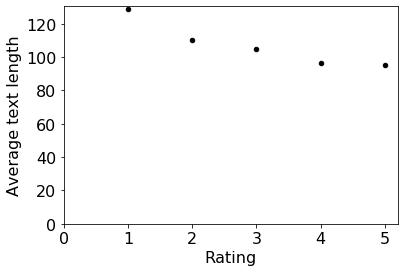

In [25]:
#Q18: What is the relationship between the rating and the average text length?
def avg_text_each_rating():
    bucket = bucketize('rating')
    rating = []
    avg_text = []
    for i in bucket:
        rating.append(i)
        length = 0
        count = 0
        for r in bucket[i]:
            length += len(getattr(r, "text"))
            count += 1
        avg = length/count
        avg_text.append(avg)
    return rating,avg_text
avg_text_each_rating()

scatter(avg_text_each_rating()[0],
        avg_text_each_rating()[1],
        xlabel="Rating", ylabel="Average text length")

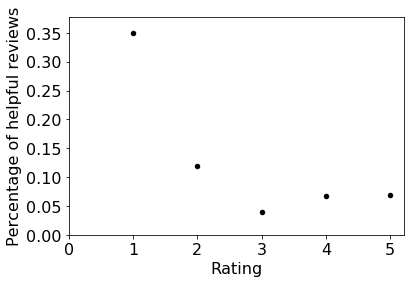

In [26]:
#Q19: What is the relationship between the rating and the likelihood of the review being helpful?
def likelihood_helpful_each_rating():
    bucket = bucketize('rating')
    rating = []
    prob_helpful = []
    for i in bucket:
        rating.append(i)
        helpful = 0
        count = 0
        for r in bucket[i]:
            if getattr(r, "num_helpful") > 0:
                helpful += 1
            count += 1
        prob = helpful/count
        prob_helpful.append(prob)
    return rating,prob_helpful

scatter(likelihood_helpful_each_rating()[0],
        likelihood_helpful_each_rating()[1],
        xlabel="Rating", ylabel="Percentage of helpful reviews")

In [27]:
#Q20: Find the average rating of each product.
def avg_rating_each_product():
    bucket = bucketize("asin")
    product_list = read_json("products.json")
    new = {}
    for i in product_list:
        sum = 0
        count = 0
        for r in bucket[i]:
            sum += getattr(r, "rating")
            count += 1
        avg = sum/count
        new[product_list[i]] = avg
    return new

avg_rating_each_product()  

{'Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders': 4.7272727272727275,
 'Amazon Tap Smart Assistant Alexa enabled (black) Brand New': 4.6909090909090905,
 'All-New Kindle E-reader - Black, 6" Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers': 4.590163934426229,
 'Amazon Echo (2nd Generation) Smart Assistant Oak Finish Priority Shipping': 5.0,
 'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers': 4.666666666666667,
 'All-new Echo (2nd Generation) with improved sound, powered by Dolby, and a new design Walnut Finish': 5.0,
 'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case': 4.603448275862069,
 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Black': 4.583333333333333,
 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta': 4.574468085106383,


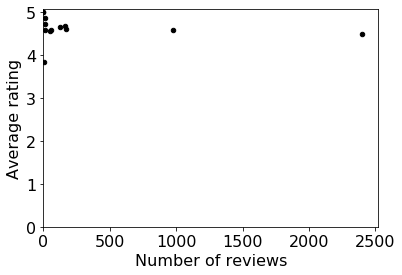

In [28]:
#Q21: What is the relationship between the number of reviews and the average rating of a product?
def likelihood_helpful_each_rating():
    bucket = bucketize("asin")
    avg_rating_list = avg_rating_each_product()
    product_list = read_json("products.json")
    num_review = []
    avg_rating = []
    for i in bucket:
        num_review.append(len(bucket[i]))
        for j in avg_rating_list:
            if j == product_list[i]:
                avg_rating.append(avg_rating_list[product_list[i]])
    return num_review, avg_rating

scatter(likelihood_helpful_each_rating()[0],
        likelihood_helpful_each_rating()[1],
        xlabel="Number of reviews", ylabel="Average rating")

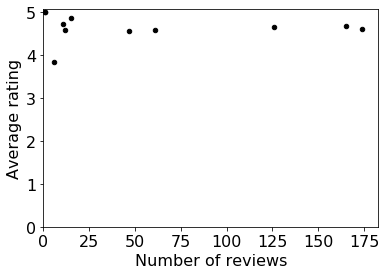

In [29]:
#Q22: Remove the outliers from the last plot.
def remove_outlier():
    num_review = likelihood_helpful_each_rating()[0]
    avg_rating = likelihood_helpful_each_rating()[1]
    new_num = []
    new_avg = []
    for i in range(len(num_review)):
        if num_review[i]<=500:
            new_num.append(num_review[i])
            new_avg.append(avg_rating[i])
    return new_num,new_avg

scatter(remove_outlier()[0],
        remove_outlier()[1],
        xlabel="Number of reviews", ylabel="Average rating")

In [30]:
import matplotlib, pandas

def plot_dict(d, label_x, label_y="Please Label Me!!!"):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_xlabel(label_x, fontsize=16)
    ax.set_ylabel(label_y, fontsize=16)

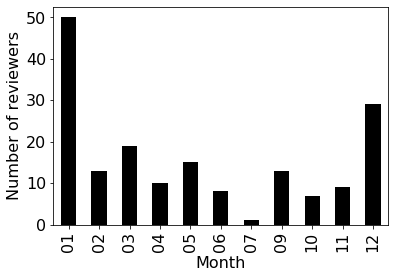

In [31]:
#Q23: What is the relationship between the month and the total number of reviews for the product
# 'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case' for each month?
def month_num_reviews(product_name):
    product_list = read_json("products.json")
    for i in product_list:
        if product_list[i] == product_name:
            asin = i
    product_list = bucketize("asin")[asin]
    count = {}
    date_list = []
    for r in product_list:
         date_list.append(getattr(r, "date"))
    
    for i in date_list:
        if i[5:7] not in count:
            count[i[5:7]] = 1
        else:
            count[i[5:7]] += 1
    return count
    
plot_dict(month_num_reviews('Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case'),"Month", "Number of reviewers")

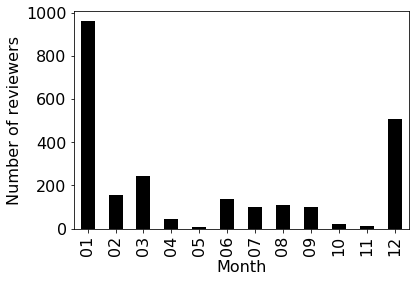

In [32]:
#Q24: What is the relationship between the month and the total number of reviews for the product 'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta' for each month?
plot_dict(month_num_reviews('Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta'),"Month", "Number of reviewers")

In [33]:
file_list = []
def get_all_file_path(directory_path):
    for i in os.listdir(directory_path):
        dir = os.path.join(directory_path,i)
        if os.path.isdir(dir):
            get_all_file_path(dir)
        if os.path.isfile(dir):
            file_list.append(dir)
    return file_list

In [34]:
#Q25: List the paths in the very_helpful directory of rating4 of broken_file.
file_list = []
get_all_file_path(os.path.join("broken_file", "rating4", "very_helpful"))

['broken_file\\rating4\\very_helpful\\very_helpful.json']

In [35]:
#Q26: List the paths of all the files in the rating5 directory of broken_file.
file_list = []
sorted(get_all_file_path(os.path.join("broken_file", "rating5")),reverse = True)

['broken_file\\rating5\\others.json',
 'broken_file\\rating5\\helpful\\helpful.json']

In [36]:
#Q27: List the paths of all the files in the broken_file directory.
file_list = []
sorted(get_all_file_path(os.path.join("broken_file")),reverse = True)

['broken_file\\rating5\\others.json',
 'broken_file\\rating5\\helpful\\helpful.json',
 'broken_file\\rating4\\very_helpful\\very_helpful.json',
 'broken_file\\rating4\\others\\short\\short.json',
 'broken_file\\rating4\\others\\others\\others.json',
 'broken_file\\rating4\\not_helpful.json',
 'broken_file\\rating3\\others\\others.json',
 'broken_file\\rating3\\long\\long.json',
 'broken_file\\others.json']

In [37]:
#Q28: Combine all the files in broken_file directory and find the number of unique products 
# being reviewed in these files.
file_list = []
def combine_broken_file():
    json_file = sorted(get_all_file_path(os.path.join("broken_file")),reverse = True)
    broken_dict = {}
    for file in json_file:
        f = open(file, encoding = "utf-8")
        json_str = f.read()
        f.close()
        data = json.loads(json_str)
        for i in data:
            broken_dict[i] = data[i]
    return broken_dict

def num_unique_product():
    broken_file = combine_broken_file()
    x = {}
    for i in broken_file:
        if broken_file[i][1] not in x:
            x[broken_file[i][1]] = 1
        else:
            x[broken_file[i][1]] += 1
    return x
len(num_unique_product())

1

In [38]:
def get_broken_reviews(csv,json_data):
    list_review = []
    Review = namedtuple("Review",["id", "username", "asin","title","text","rating","do_recommend","num_helpful","date"])
    csv_data = read_csv(csv)
    for j in json_data:
        for c in csv_data:
            if c["review id"] != "" and c["review title"] != "" and c["review text"] != "" and c["review rating"]!= "" and c["review date"] != "" and c["review date"]!=None:
                if c["review id"] == j and c["review rating"].isdigit():
                    list_review.append(Review(int(j), json_data[j][0], json_data[j][1], c["review title"] , c["review text"], int(c["review rating"]), c["review do_recommend"]=="True", int(c["review num_helpful"]), c["review date"]))
    return list_review



In [39]:
#Q29: Combine all the files in the directories data and broken_file, and find the total number of reviews.
final_data = get_broken_reviews("review3.csv", combine_broken_file())+ review_dataset()
len(final_data)

4995

In [40]:
#Q30: What is the percentage of change in the average rating changed for the product 'Fire Tablet, 
# 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta', because of the addition of the new data?
def percentage_change(product_name):
    before = avg_rating_each_product()[product_name]
    product_list = read_json("products.json")
    sum = 0
    count = 0
    for i in product_list:
        if product_list[i] == product_name:
            asin = i
    for r in final_data:
        if getattr(r, 'asin') == asin:
            sum += getattr(r, 'rating')
            count +=1
    after = sum/count
    return (after-before)/before*100
percentage_change('Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta')

-0.039407079451942564